# Velofahren in der Stadt durch die Linse der Zeitreihenanalyse - Zeitreihenanalyse

Detaillierte Informationen zu den Zähldaten von Velofahrten bei der Unterführung Langstrasse an der Ecke Langstrasse - Europaallee (Zürich) sind im Notebook [01-Datenaufbereitung](https://github.com/curdon/velo-prophet/blob/main/Datenanalyse/Code/01-Datenaufbereitung.ipynb) zusammengefasst.

In diesem Notebook werden die aufbereiteten Zähldaten gelesen und mit der Software [Prophet](https://facebook.github.io/prophet/) analysiert. Im Speziellen wird die Zeitreihe in Komponenten wie Trend und Saisonalität aufgeteilt. Prophet erwartet eine Input-Datei mit zwei Spalten, *ds* (Zeitstempel) und *y* (Messwert).

## Python Bibliotheken laden
Falls Sie einzelne Bibliotheken noch nicht installiert haben, müssen Sie das noch nachholen. Für Prophet beispielsweise mit:
> %pip install prophet

In [104]:
from prophet import Prophet
from prophet.make_holidays import make_holidays_df

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

## Aufbereitete Velozähldaten laden
Die Daten werden vom CSV-Format als Pandas Dataframe geladen.

In [93]:
velo_messungen = pd.read_csv("../Daten/velozaehldaten_aufbereitet.csv", index_col=0)

Das Zeitfeld muss für die nachfolgenden Analysen noch explizit als solches formattiert werden.

In [94]:
velo_messungen['ds'] = pd.to_datetime(velo_messungen['ds'], format="%Y-%m-%dT%H:%M")

In [91]:
velo_messungen.head(10)

,ds,y,ds_test
0,2021-01-01 00:00:00,22.0,2021-01-01 00:00:00
1,2021-01-01 01:00:00,53.0,2021-01-01 01:00:00
2,2021-01-01 02:00:00,73.0,2021-01-01 02:00:00
3,2021-01-01 03:00:00,53.0,2021-01-01 03:00:00
4,2021-01-01 04:00:00,36.0,2021-01-01 04:00:00
5,2021-01-01 05:00:00,20.0,2021-01-01 05:00:00
6,2021-01-01 06:00:00,23.0,2021-01-01 06:00:00
7,2021-01-01 07:00:00,17.0,2021-01-01 07:00:00
8,2021-01-01 08:00:00,10.0,2021-01-01 08:00:00
9,2021-01-01 09:00:00,20.0,2021-01-01 09:00:00


Wie eingangs erläutert umfasst die Inputtabelle die bieden Spalten *ds* und *y*. Jede Zeile entspricht einer Stunde zwischen Januar 2021 und Dezember 2023 und weisst die Summe der Velofahrten aus. Am 1. Januar 2021 wurden zwischen Mitternacht und 1 Uhr Morgens beispielsweise 22 Velofahrten registriert.

## Velozählungen visualisieren
Im Folgenden werden die Velozähldaten (Velofahrten pro Stunde) für unterschiedliche Zeitfenster visualisiert:
1. Zwei Jahre 2022 und 2023
2. Zwei Wochen im Juni 2023
3. Ein Tag im Juni 2023

Die Visualisierungen dienen dazu, einen ersten Eindruck zu möglichen zeitlichen Mustern in den Velozählungen zu erhalten.

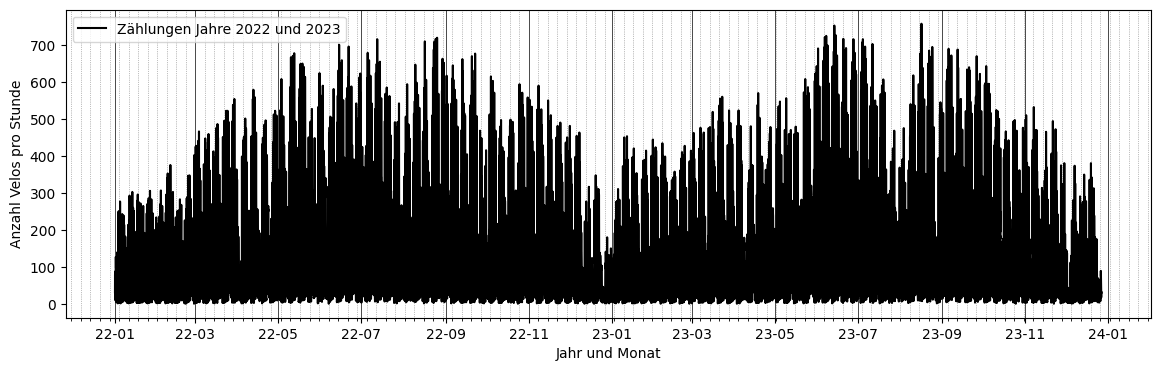

In [68]:
start = datetime(2022, 1, 1)
end = datetime(2023, 12, 31)
actual_filtered = velo_messungen[(velo_messungen['ds'] >= start) & (velo_messungen['ds'] <= end)]

# Plotting predictions
plt.figure(figsize=(14, 4))
plt.plot(actual_filtered['ds'], actual_filtered['y'], label='Zählungen Jahre 2022 und 2023', color = "black")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.legend()

# Setting major and minor gridlines
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))

# Enable grid only for x-axis
ax.xaxis.grid(True, which='major', linestyle='-', linewidth='0.5', color='black')  # Major gridlines for x-axis
ax.xaxis.grid(True, which='minor', linestyle=':', linewidth='0.5', color='gray')  # Minor gridlines for x-axis

plt.xlabel('Jahr und Monat')
plt.ylabel('Anzahl Velos pro Stunde')

plt.show()

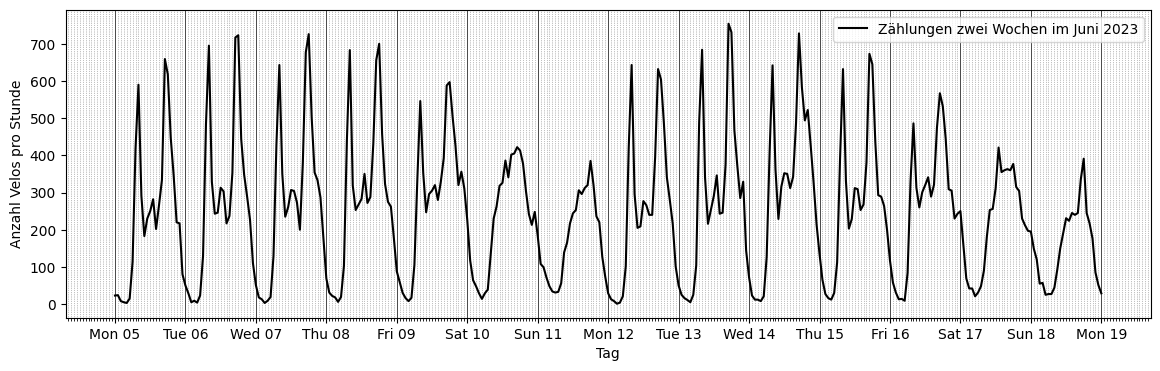

In [65]:
# Filtering data for plotting
start = datetime(2023, 6, 5)
end = datetime(2023, 6, 19)
actual_filtered = velo_messungen[(velo_messungen['ds'] >= start) & (velo_messungen['ds'] <= end)]

# Plotting predictions
plt.figure(figsize=(14, 4))
plt.plot(actual_filtered['ds'], actual_filtered['y'], label='Zählungen zwei Wochen im Juni 2023', color = "black")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.legend()

# Setting major and minor gridlines
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a %d'))

# Enable grid only for x-axis
ax.xaxis.grid(True, which='major', linestyle='-', linewidth='0.5', color='black')  # Major gridlines for x-axis
ax.xaxis.grid(True, which='minor', linestyle=':', linewidth='0.5', color='gray')  # Minor gridlines for x-axis

plt.xlabel('Tag')
plt.ylabel('Anzahl Velos pro Stunde')

plt.show()

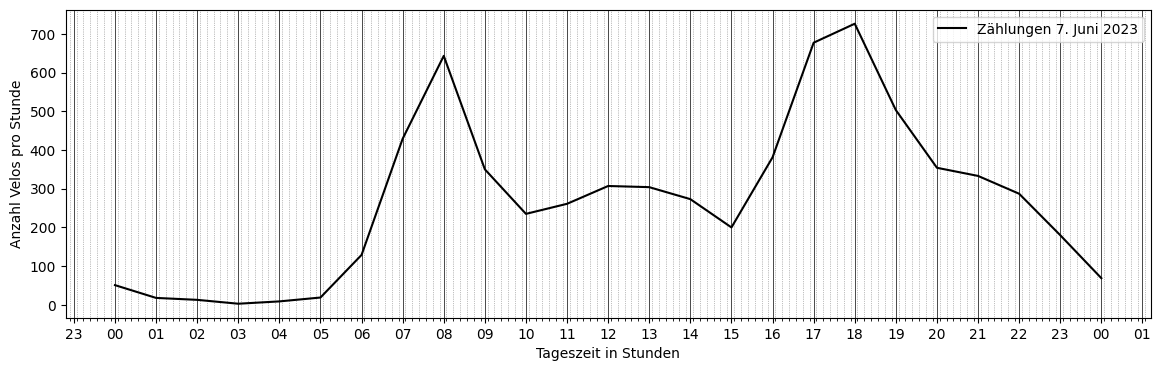

In [64]:
# Filtering data for plotting
start = datetime(2023, 6, 7)
end = datetime(2023, 6, 8)
actual_filtered = velo_messungen[(velo_messungen['ds'] >= start) & (velo_messungen['ds'] <= end)]

# Plotting predictions
plt.figure(figsize=(14, 4))
plt.plot(actual_filtered['ds'], actual_filtered['y'], label='Zählungen 7. Juni 2023', color = "black")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.legend()

# Setting major and minor gridlines
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H'))

# Enable grid only for x-axis
ax.xaxis.grid(True, which='major', linestyle='-', linewidth='0.5', color='black')  # Major gridlines for x-axis
ax.xaxis.grid(True, which='minor', linestyle=':', linewidth='0.5', color='gray')  # Minor gridlines for x-axis

plt.xlabel('Tageszeit in Stunden')
plt.ylabel('Anzahl Velos pro Stunde')

plt.show()

## Prophet Model erstellen und konfigurieren

- Detaillierte Informationen zum Erstellen von Prophet Modellen finden Sie [hier](https://facebook.github.io/prophet/docs/quick_start.html).
- Wir erstellen ein Prophet Model, welches keine Changepoints hat (*n_changepoints=0*). Das bedeutet, dass sich der Trend über den Beobachtungszeitraum nicht ändert (bzw. konstant zu- oder abnimmt). Dies vereinfacht die Interpretation der Resultate, entspricht aber nicht unbedingt dem besten Zeitreihenmodel. Wenn nichts angegeben wird, wird die Anzahl Changepoints von Prophet geschätzt.
- Wir benützten die Funktion *make_holidays_df()* um Feiertage für Zürich zu definieren.

In [107]:
feiertage_schweiz = make_holidays_df(
    year_list=[2021, 2022, 2023], country='CH', province='ZH'
)
feiertage_schweiz.head(n=15)

,ds,holiday
0,2021-04-02,Good Friday
1,2021-04-05,Easter Monday
2,2021-05-24,Whit Monday
3,2021-12-26,St. Stephen's Day
4,2021-01-02,Berchtold's Day
5,2021-05-01,Labor Day
6,2021-01-01,New Year's Day
7,2021-04-04,Easter Sunday
8,2021-05-13,Ascension Day
9,2021-05-23,Whit Sunday


In [109]:
velo_model = Prophet(n_changepoints=0, holidays=feiertage_schweiz)

## Prophet Model berechnen und auf die Daten anwenden

In [110]:
velo_model.fit(velo_messungen)
velo_vorhersage = velo_model.predict(velo_messungen)

16:43:35 - cmdstanpy - INFO - Chain [1] start processing
16:43:36 - cmdstanpy - INFO - Chain [1] done processing


## Zeitreihen-Komponenten darstellen

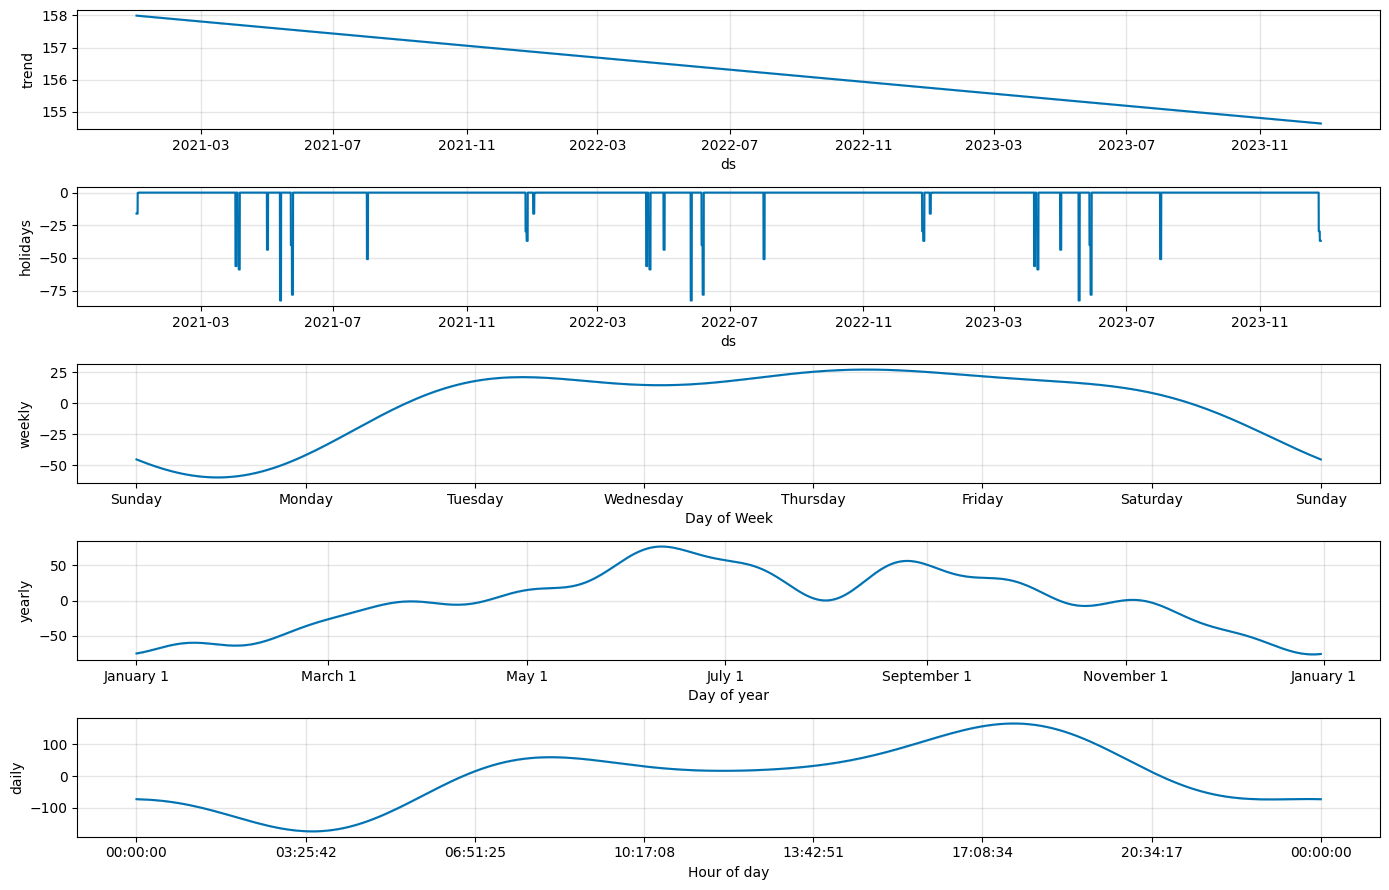

In [111]:
fig_komponenten = velo_model.plot_components(velo_vorhersage, figsize=(14,9))

### Lesehilfe zu der Komponenten-Abbildung

- Jede wichtige Komponente der Zeitreihe wird als eigene Graphik dargestellt. In unserem Fall werden die Velozählungen in einen Trend, Feiertage und Saisonalitäten für Jahre, Wochen und Tage unterteilt.
- Trend: Die Velofahrten nehmen über die drei Jahre leicht ab (von 157 auf 154 Zählungen pro Stunde)
- Feiertage (*holidays*): Die vertikalen Striche zeigen an, wie stark sich die Anzahl Velofahrten an einem Feiertag von einem normalen Tag unterscheiden. Alle Feiertage haben einen negativen Effekt auf die Anzahl Velofahrten. An der Auffahrt weichen die Zähldaten am stärksten von den Erwartungen ab. Es werden ca. 80 Fahrten pro Stunde weniger gezählt. Spezielle Feiertage für Zürich, wie Sechseläuten oder 1. Mai könnten noch zusätzlich erfasst werden.
- Jahreszeitliche Schwankungen (*yearly*): Grundsätzlich werden im Sommer mehr Velofahrten gezählt als im Winter. Mitten im Sommer, während der Sommerferien, gibt es jedoch einen Einbruch in den Zähldaten.
- Wöchentliche Schwankungen (*weekly*): Am Sonntag benützen am wenigsten Züricher das Velo. Die meisten Velofahrten werden am Donnerstag gezählt.
- Tägliche Schwankungen (*daily*): An einem durchschnittlichen Tag gibt es zwei Maximas an Velozählungen. Diese repräsentieren die Pendlerbewegungen am Morgen hin zum Arbeitsplatz (ca. 07:30:00) und am Abend zurück nach Hause (ca. 17:30:00).

## Vergleich Vorhersagen und Zählwerte

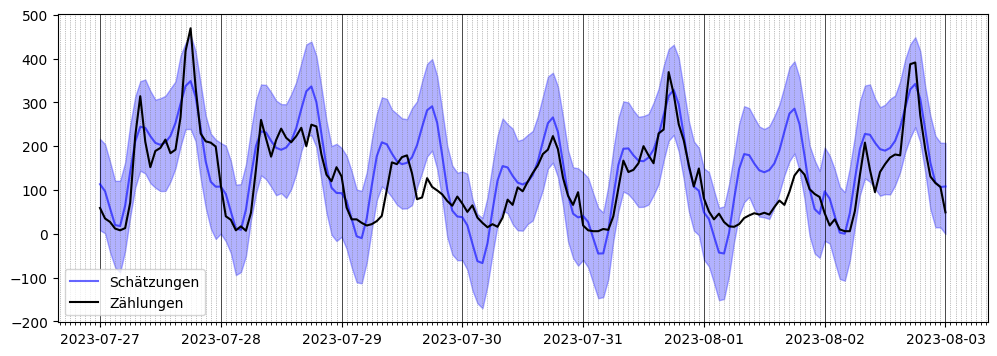

In [112]:
# Filtering data for plotting
start = datetime(2023, 7, 27)
end = datetime(2023, 8, 3)
forecast_filtered = velo_vorhersage[(velo_vorhersage['ds'] >= start) & (velo_vorhersage['ds'] <= end)]
actual_filtered = velo_messungen[(velo_messungen['ds'] >= start) & (velo_messungen['ds'] <= end)]

# Plotting predictions
plt.figure(figsize=(12, 4))
plt.plot(forecast_filtered['ds'], forecast_filtered['yhat'], color='blue', alpha=0.6, label='Schätzungen')
plt.fill_between(forecast_filtered['ds'], forecast_filtered['yhat_lower'], forecast_filtered['yhat_upper'], color='blue', alpha=0.3)
plt.plot(actual_filtered['ds'], actual_filtered['y'], label='Zählungen', color = "black")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.legend()

# Setting major and minor gridlines
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Enable grid only for x-axis
ax.xaxis.grid(True, which='major', linestyle='-', linewidth='0.5', color='black')  # Major gridlines for x-axis
ax.xaxis.grid(True, which='minor', linestyle=':', linewidth='0.5', color='gray')  # Minor gridlines for x-axis

plt.show()

## Residuen darstellen

Residuen sind der Unterschied zwischen einem beobachteten Zählwert zu einem Zeitpunkt und dem Vorhersagewert

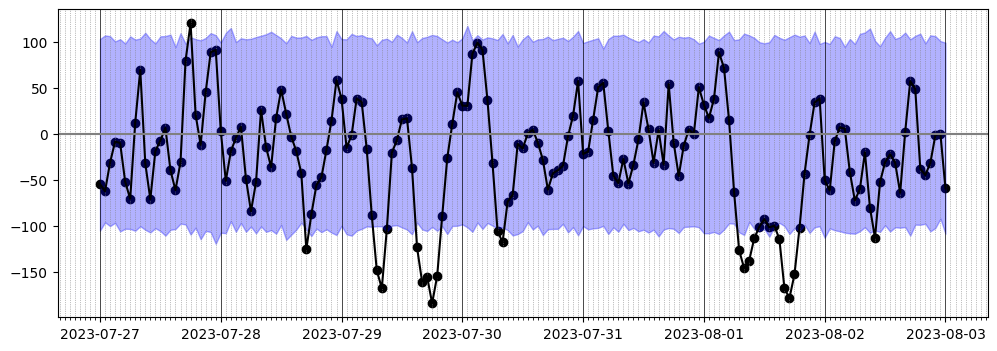

In [113]:
# Calculating residuals
residuals = pd.DataFrame({
    'residuals': actual_filtered['y'] - forecast_filtered['yhat'],
    'ds': actual_filtered['ds'],
    'lower': forecast_filtered['yhat_lower'] - forecast_filtered['yhat'],
    'upper': forecast_filtered['yhat_upper'] - forecast_filtered['yhat']
})

# Plotting residuals
plt.figure(figsize=(12, 4))
plt.plot(residuals['ds'], residuals['residuals'], color = "black")
plt.scatter(residuals['ds'], residuals['residuals'], color = "black")
plt.fill_between(residuals['ds'], residuals['lower'], residuals['upper'], color='blue', alpha=0.3)
plt.axhline(y=0, color='grey')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())

# Setting major and minor gridlines
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Enable grid only for x-axis
ax.xaxis.grid(True, which='major', linestyle='-', linewidth='0.5', color='black')  # Major gridlines for x-axis
ax.xaxis.grid(True, which='minor', linestyle=':', linewidth='0.5', color='gray')  # Minor gridlines for x-axis

plt.show()

In der ausgewählten Zeitperiode werden an zwei Tagen auffällig wenige Velofahrten gezählt.
- Am 29. Juli ist ein Strum über Zürich gezogen (Archiv Link [hier](http://sturmarchiv.ch/index.php?title=20230729_02_Hail_Rueterswil_SG))
- Der 1. August ist eigentlich als Feiertag im Modell enthalten, wird aber offensichtlicherweise nicht ausreichend berücksichtigt.